In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from glob import glob
import random
from uncertainties import ufloat
from uncertainties import unumpy
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(
    420133769
)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

In [3]:
nodelabels=['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben', 'Matrize_zarge_mitte','Matrize_zarge_unten', 'Werkstueck_boden', 'Werkstueck_zarge_unten' , 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

filenames = glob("../merged/*.csv")
#sample from list XX% train test
train = random.sample(filenames, int(len(filenames)*0.7))                      
test = list(set(filenames) - set(train))
print(test)
train_df = []
print('train_data')
for filename in train:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates().drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    train_df.append(df_wd)
    
train_data= pd.concat(train_df, axis=0, ignore_index=True).dropna()



print('test_data')
test_df = []

for filename in test:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates().drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    test_df.append(df_wd)  
    
test_data= pd.concat(test_df, axis=0, ignore_index=True).dropna()



['../merged/merged_WS940_WZ70_p12_t6.csv', '../merged/merged_WS890_WZ160_p11_t4.csv', '../merged/merged_WS940_WZ70_p11_t6.csv', '../merged/merged_WS840_WZ130_p10_t10.csv', '../merged/merged_WS950_WZ90_p19_t10.csv', '../merged/merged_WS950_WZ110_p19_t10.csv']
train_data
reading: ../merged/merged_WS1000_WZ100_p11_t4.csv
reading: ../merged/merged_WS950_WZ110_p19_t8.csv
reading: ../merged/merged_WS1000_WZ100_p11_t8.csv
reading: ../merged/merged_WS890_WZ160_p10_t10.csv
reading: ../merged/merged_WS840_WZ130_p10_t4.csv
reading: ../merged/merged_WS940_WZ70_p12_t8.csv
reading: ../merged/merged_WS890_WZ160_p10_t4.csv
reading: ../merged/merged_WS950_WZ90_p15_t10.csv
reading: ../merged/merged_WS1000_WZ100_p11_t6.csv
reading: ../merged/merged_WS950_WZ90_p23_t10.csv
reading: ../merged/merged_WS940_WZ70_p11_t4.csv
reading: ../merged/merged_WS950_WZ110_p19 .csv
test_data
reading: ../merged/merged_WS940_WZ70_p12_t6.csv
reading: ../merged/merged_WS890_WZ160_p11_t4.csv
reading: ../merged/merged_WS940_WZ7

/home/fneubuerger/.local/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [4]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [5]:

Werkstueck_labels = ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',                       
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben']
 

In [6]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [7]:
X_train = train_data.drop(labels=Werkstueck_labels , axis=1)
y_train = train_data[targets]
X_test = test_data.drop(labels=Werkstueck_labels, axis=1)
y_test = test_data[targets]

In [8]:
def kfold(model, k):
    train_scores = []
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
    
        y_hat_train = model.predict(fold_X)    
        rmse, variance = evaluate(fold_y, y_hat_train, 'train')
        train_scores.append([rmse, variance])

        y_hat_test = model.predict(X_test)
        test_rmse, test_variance = evaluate(y_hat_test, y_hat_test)
        test_scores.append([test_rmse, test_variance])
    
    mean_train = np.mean(train_scores, axis=0)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

### Simple linear model as baseline

In [9]:
#kfold
model=LinearRegression()
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
train set RMSE:2.7795524041054254, R2:0.9999225761221894
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:8.722572742612295, R2:0.9993299858871931
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:18.87628099701299, R2:0.9962791184524254
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:10+/-7 , R2:0.9985+/-0.0016


In [10]:
# over all data
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:17.139774924961646, R2:0.9971531397795768
test set RMSE:18.3024383067544, R2:0.9963757779715513


(18.3024383067544, 0.9963757779715513)

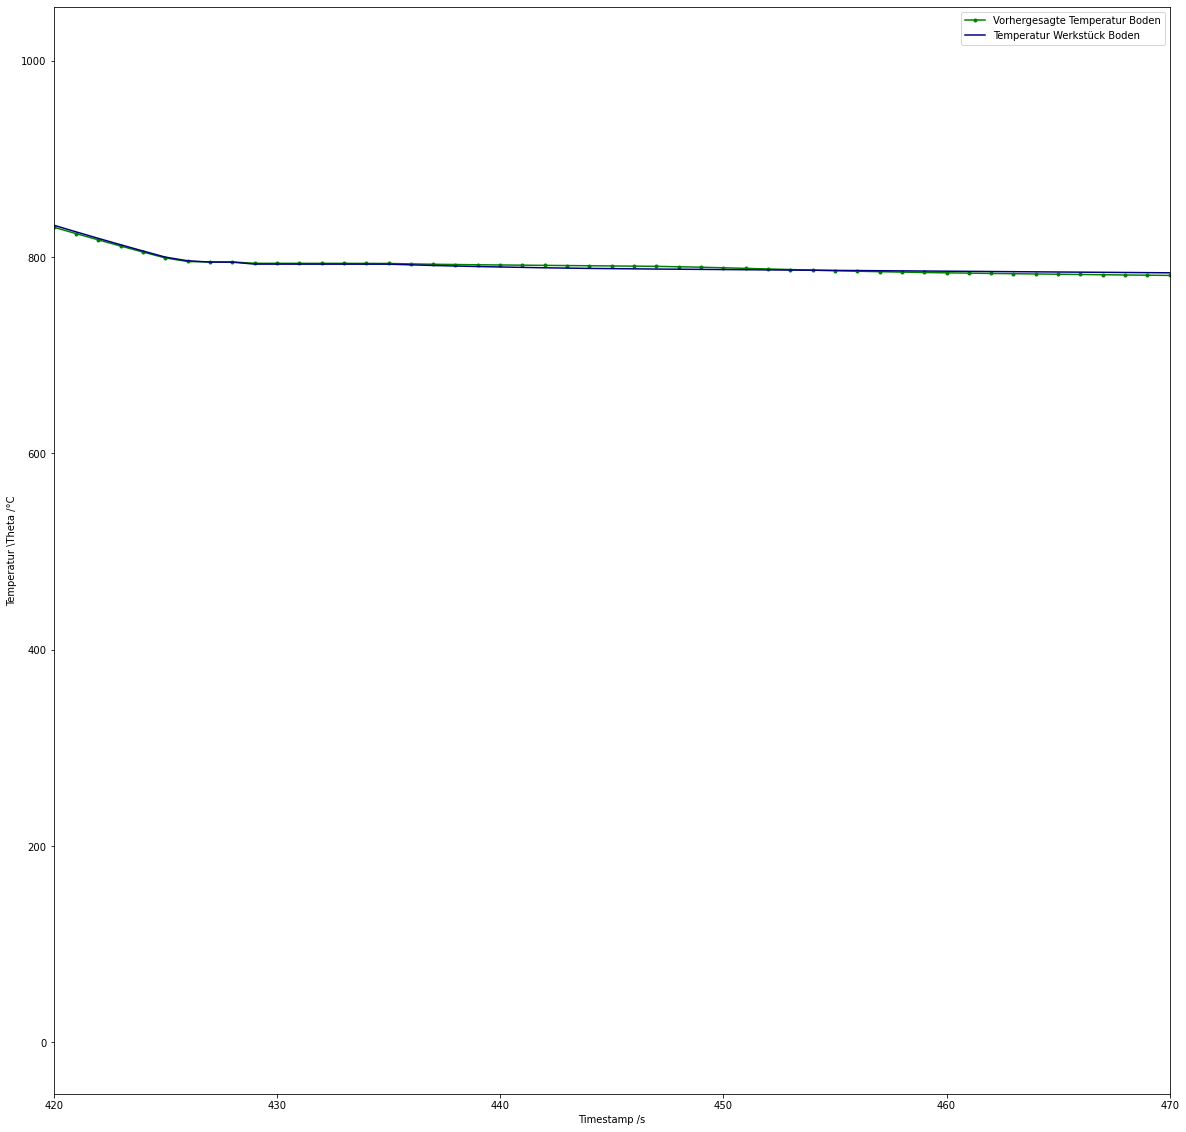

In [11]:
Timestamp=np.arange(len(test_data))
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, test_data['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
mean_train, std_train = kfold(rf, 3)

__________Fold 1__________
train set RMSE:1.185492782244923, R2:0.9999859211972509
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.160240191223057, R2:0.9999589312960945
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:2.27023460471481, R2:0.9999462837609941
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.9+/-0.5 , R2:0.999964+/-0.000017


In [14]:
RMSEs = []
R2s = []
for trees in np.arange(10, 200,10):
    rf = RandomForestRegressor(n_estimators=trees)
    RMSE, R2 = kfold(rf, 3)
    RMSEs.append(RMSE)
    R2s.append(R2)



RMSEs  = unumpy.uarray([x.nominal_value for x in RMSEs],[x.std_dev for x in RMSEs] )
R2s  = unumpy.uarray([x.nominal_value for x in R2s],[x.std_dev for x in R2s] )


__________Fold 1__________
train set RMSE:1.667830989423218, R2:0.9999721342078135
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.488708518565021, R2:0.9999454933876063
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:2.3340592453722935, R2:0.9999432846714541
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:2.2+/-0.4 , R2:0.999954+/-0.000013
__________Fold 1__________
train set RMSE:1.240151654790777, R2:0.9999845932869742
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.3256663776337154, R2:0.9999523935491567
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:2.3976100049015585, R2:0.9999401175910361
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:2.0+/-0.5 , R2:0.999959+/-0.000019
__________Fold 1__________
train set RMSE:1.341293823749655, R2:0.9999819787395526
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.186567136762527, R2:0.9999579263706447
test set RMSE:0

[150]
[10]


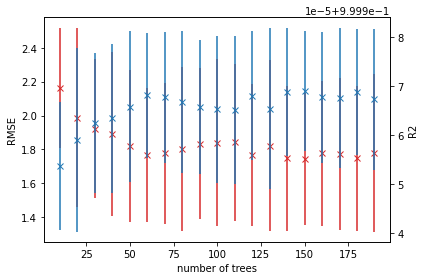

In [15]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of trees')
ax1.set_ylabel('RMSE')
ax1.errorbar(np.arange(10,200,10), unumpy.nominal_values(RMSEs), yerr=unumpy.std_devs(RMSEs), fmt='x', color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2')  # we already handled the x-label with ax1
ax2.errorbar(np.arange(10,200,10), unumpy.nominal_values(R2s), yerr=unumpy.std_devs(R2s),fmt='x', color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/tree_parameter.png')
print(np.arange(10,200,10)[unumpy.nominal_values(RMSEs)==min(unumpy.nominal_values(RMSEs))])
print(np.arange(10,200,10)[unumpy.std_devs(RMSEs)==min(unumpy.std_devs(RMSEs))])

In [16]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:13.764492018490973, R2:0.9981627257984634
test set RMSE:15.500698872765721, R2:0.9973956476854778


(15.500698872765721, 0.9973956476854778)

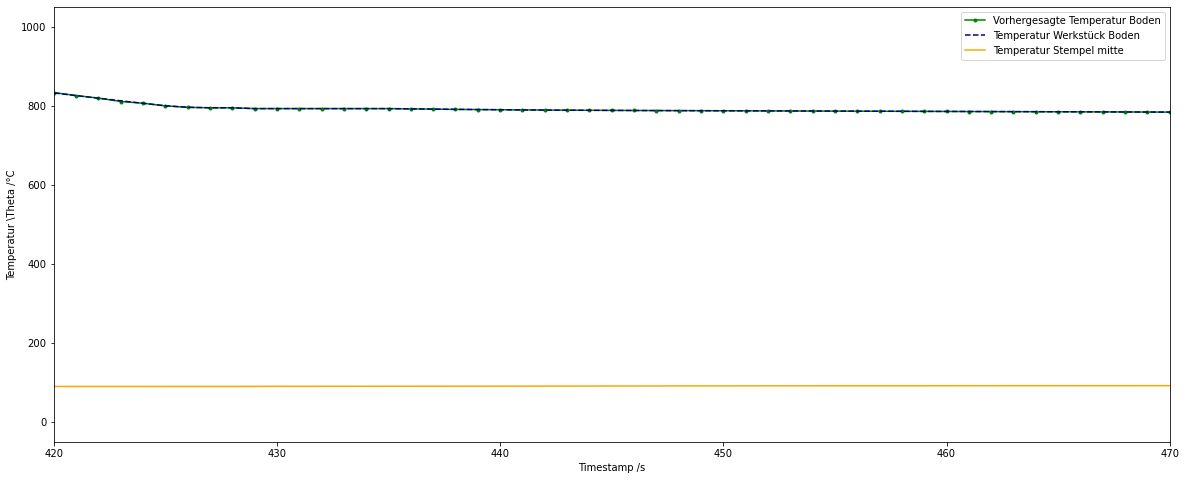

In [17]:
plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/random_forest_model.png')

In [18]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [19]:
mean_train, std_train = kfold(gb, 3)

__________Fold 1__________
train set RMSE:1.2951301458232831, R2:0.9999831967684094
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.529685561183963, R2:0.9999436874405946
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:3.6190911213245793, R2:0.999863358686038
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:2.5+/-0.9 , R2:0.99993+/-0.00005


In [20]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:12.801589437014654, R2:0.9984112230483936
test set RMSE:15.29315289493303, R2:0.9974677463083257


(15.29315289493303, 0.9974677463083257)

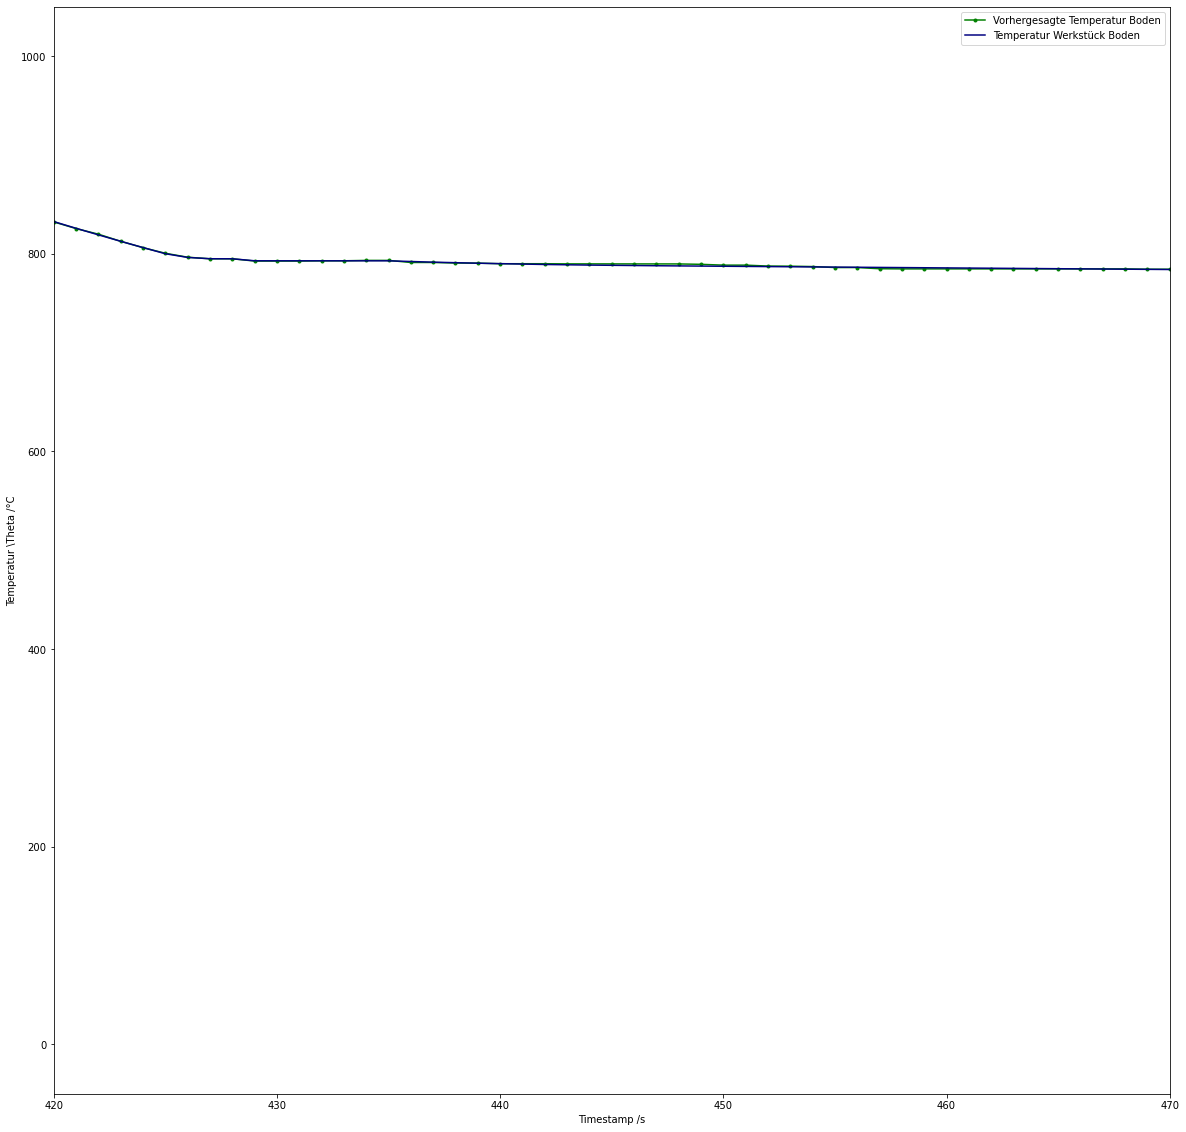

In [21]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [23]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3,555
Trainable params: 3,555
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
62/62 [==============================] - 1s 6ms/step - loss: 169821.1250 - val_loss: 43791.6055
Epoch 2/300
62/62 [==============================] - 0s 3ms/step - loss: 11970.7588 - val_loss: 1991.7708
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 1175.8666 - val_loss: 1206.0438
Epoch 4/300
62/62 [==============================] - 0s 4ms/step - loss: 934.7144 - val_loss: 1091.9133
Epoch 5/300
62/62 [==============================] - 0s 3ms/step - loss: 860.6447 - val_loss: 1040.0834
Epoch 6/300
62/62 [==============================] - 0s 3ms/step - loss: 822.7610 - val_loss: 1003.6671
Epoch 7/300
62/62 [==============================] - 0s 3ms/step - loss: 793.4961 - val_loss: 985.9579
Epoch 8/300
62/62 [==============================] - 0s 3ms/step - loss: 774.4769 - val_loss: 930.9797
Epoch 9/300
62/62 [==============================] - 0s 3ms/step - loss: 749.4200 - val_loss: 899.1571
Epoch 10/300
62/62 [==============================] - 0s 4ms

Epoch 80/300
62/62 [==============================] - 0s 3ms/step - loss: 79.3466 - val_loss: 104.0963
Epoch 81/300
62/62 [==============================] - 0s 2ms/step - loss: 82.6991 - val_loss: 69.1435
Epoch 82/300
62/62 [==============================] - 0s 2ms/step - loss: 76.5824 - val_loss: 80.1584
Epoch 83/300
62/62 [==============================] - 0s 2ms/step - loss: 84.7504 - val_loss: 69.5424
Epoch 84/300
62/62 [==============================] - 0s 2ms/step - loss: 77.4870 - val_loss: 72.1826
Epoch 85/300
62/62 [==============================] - 0s 2ms/step - loss: 80.2625 - val_loss: 71.3679
Epoch 86/300
62/62 [==============================] - 0s 2ms/step - loss: 74.6494 - val_loss: 77.1095
Epoch 87/300
62/62 [==============================] - 0s 2ms/step - loss: 75.6262 - val_loss: 68.3071
Epoch 88/300
62/62 [==============================] - 0s 2ms/step - loss: 74.3314 - val_loss: 105.6213
Epoch 89/300
62/62 [==============================] - 0s 2ms/step - loss: 90.413

62/62 [==============================] - 0s 2ms/step - loss: 45.0854 - val_loss: 64.1354
Epoch 160/300
62/62 [==============================] - 0s 2ms/step - loss: 61.7254 - val_loss: 59.6611
Epoch 161/300
62/62 [==============================] - 0s 2ms/step - loss: 37.6364 - val_loss: 49.6024
Epoch 162/300
62/62 [==============================] - 0s 2ms/step - loss: 39.5572 - val_loss: 67.9185
Epoch 163/300
62/62 [==============================] - 0s 2ms/step - loss: 41.5942 - val_loss: 56.6249
Epoch 164/300
62/62 [==============================] - 0s 2ms/step - loss: 39.0491 - val_loss: 49.7795
Epoch 165/300
62/62 [==============================] - 0s 2ms/step - loss: 36.4252 - val_loss: 53.6612
Epoch 166/300
62/62 [==============================] - 0s 3ms/step - loss: 37.8766 - val_loss: 41.7148
Epoch 167/300
62/62 [==============================] - 0s 3ms/step - loss: 40.9734 - val_loss: 45.9360
Epoch 168/300
62/62 [==============================] - 0s 2ms/step - loss: 47.6606 - va

62/62 [==============================] - 0s 3ms/step - loss: 40.6883 - val_loss: 41.5346
Epoch 239/300
62/62 [==============================] - 0s 3ms/step - loss: 30.9154 - val_loss: 36.0056
Epoch 240/300
62/62 [==============================] - 0s 3ms/step - loss: 33.3985 - val_loss: 33.8985
Epoch 241/300
62/62 [==============================] - 0s 3ms/step - loss: 29.7559 - val_loss: 46.3247
Epoch 242/300
62/62 [==============================] - 0s 3ms/step - loss: 31.3032 - val_loss: 33.5084
Epoch 243/300
62/62 [==============================] - 0s 3ms/step - loss: 34.2949 - val_loss: 33.3248
Epoch 244/300
62/62 [==============================] - 0s 3ms/step - loss: 31.2459 - val_loss: 36.0909
Epoch 245/300
62/62 [==============================] - 0s 3ms/step - loss: 38.1773 - val_loss: 40.2477
Epoch 246/300
62/62 [==============================] - 0s 3ms/step - loss: 33.7797 - val_loss: 33.7337
Epoch 247/300
62/62 [==============================] - 0s 3ms/step - loss: 28.8585 - va

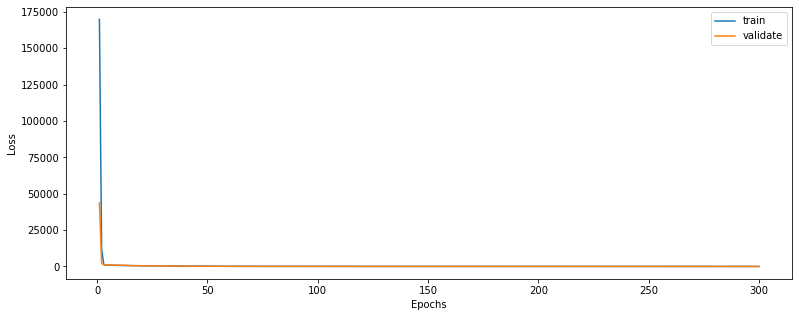

In [25]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [26]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:4.613823085816964, R2:0.9997939713173963
test set RMSE:5.158167054000584, R2:0.999712519453114


(5.158167054000584, 0.999712519453114)

In [27]:
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
21/21 [==============================] - 0s 1ms/step - loss: 8.4759
train set RMSE:2.32839416594471, R2:0.9999456995800896
test set RMSE:0.0, R2:1.0
__________Fold 2__________
21/21 [==============================] - 0s 2ms/step - loss: 43.4480
train set RMSE:5.582037230562181, R2:0.9997258549024636
test set RMSE:0.0, R2:1.0
__________Fold 3__________
21/21 [==============================] - 0s 2ms/step - loss: 32.1056
train set RMSE:4.764625315680901, R2:0.9997641225520374
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:4.2+/-1.4 , R2:0.99981+/-0.00010


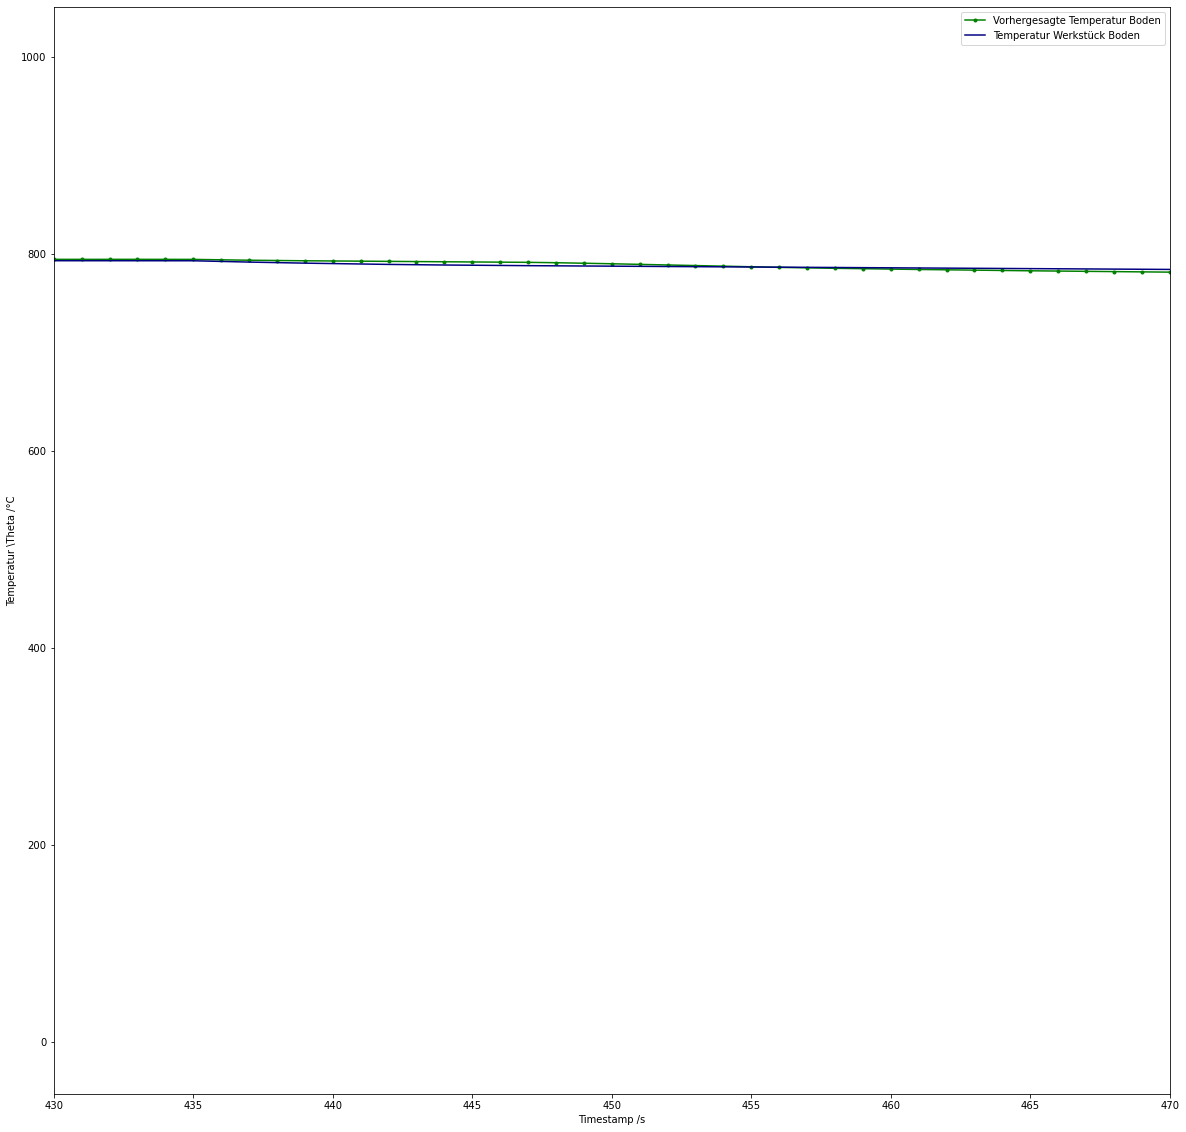

In [28]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(430, 470)
plt.legend()

plt.savefig('plots/mlp.png')

In [29]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

negloglik = lambda y, rv_y: -rv_y.log_prob(y)

def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
    ])
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

input_dim = len(X_train.keys())
output_dim= len(y_train.keys())

model = Sequential()

model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(tfpl.IndependentNormal.params_size(output_dim),
                       activation=None))
model.add(tfpl.IndependentNormal(output_dim))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
 independent_normal (Indepen  ((None, 3),              0         
 dentNormal)                  (None, 3))                         
                                                                 
Total params: 3,606
Trainable params: 3,606
Non-trainable params: 0
____________________________________________________

In [30]:
model.compile(loss='mse', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
62/62 [==============================] - 1s 4ms/step - loss: 83172.5781 - val_loss: 7657.1689
Epoch 2/300
62/62 [==============================] - 0s 2ms/step - loss: 1961.6927 - val_loss: 1019.8090
Epoch 3/300
62/62 [==============================] - 0s 2ms/step - loss: 813.6443 - val_loss: 860.9675
Epoch 4/300
62/62 [==============================] - 0s 2ms/step - loss: 737.3296 - val_loss: 809.3874
Epoch 5/300
62/62 [==============================] - 0s 2ms/step - loss: 707.3709 - val_loss: 777.6006
Epoch 6/300
62/62 [==============================] - 0s 2ms/step - loss: 681.2929 - val_loss: 727.5146
Epoch 7/300
62/62 [==============================] - 0s 3ms/step - loss: 649.6397 - val_loss: 696.4974
Epoch 8/300
62/62 [==============================] - 0s 3ms/step - loss: 624.8040 - val_loss: 657.6699
Epoch 9/300
62/62 [==============================] - 0s 3ms/step - loss: 596.9398 - val_loss: 605.5854
Epoch 10/300
62/62 [==============================] - 0s 2ms/step - 

62/62 [==============================] - 0s 2ms/step - loss: 84.9117 - val_loss: 71.2803
Epoch 81/300
62/62 [==============================] - 0s 2ms/step - loss: 72.5834 - val_loss: 63.2235
Epoch 82/300
62/62 [==============================] - 0s 2ms/step - loss: 71.0427 - val_loss: 67.6000
Epoch 83/300
62/62 [==============================] - 0s 2ms/step - loss: 83.7438 - val_loss: 65.3871
Epoch 84/300
62/62 [==============================] - 0s 2ms/step - loss: 76.8959 - val_loss: 63.8290
Epoch 85/300
62/62 [==============================] - 0s 2ms/step - loss: 71.8321 - val_loss: 65.8002
Epoch 86/300
62/62 [==============================] - 0s 2ms/step - loss: 70.5724 - val_loss: 70.7006
Epoch 87/300
62/62 [==============================] - 0s 2ms/step - loss: 72.4341 - val_loss: 78.5144
Epoch 88/300
62/62 [==============================] - 0s 2ms/step - loss: 70.8589 - val_loss: 77.5425
Epoch 89/300
62/62 [==============================] - 0s 3ms/step - loss: 72.5526 - val_loss: 6

Epoch 160/300
62/62 [==============================] - 0s 2ms/step - loss: 58.0437 - val_loss: 57.7181
Epoch 161/300
62/62 [==============================] - 0s 2ms/step - loss: 52.9691 - val_loss: 70.8715
Epoch 162/300
62/62 [==============================] - 0s 3ms/step - loss: 52.5740 - val_loss: 57.4564
Epoch 163/300
62/62 [==============================] - 0s 3ms/step - loss: 50.8031 - val_loss: 53.2492
Epoch 164/300
62/62 [==============================] - 0s 3ms/step - loss: 51.0601 - val_loss: 77.7580
Epoch 165/300
62/62 [==============================] - 0s 3ms/step - loss: 56.2510 - val_loss: 57.7779
Epoch 166/300
62/62 [==============================] - 0s 2ms/step - loss: 48.9965 - val_loss: 70.5517
Epoch 167/300
62/62 [==============================] - 0s 2ms/step - loss: 56.5905 - val_loss: 55.5655
Epoch 168/300
62/62 [==============================] - 0s 5ms/step - loss: 55.7756 - val_loss: 53.1192
Epoch 169/300
62/62 [==============================] - 0s 3ms/step - loss

62/62 [==============================] - 0s 3ms/step - loss: 43.3415 - val_loss: 49.5551
Epoch 240/300
62/62 [==============================] - 0s 2ms/step - loss: 44.0987 - val_loss: 46.6278
Epoch 241/300
62/62 [==============================] - 0s 2ms/step - loss: 40.3420 - val_loss: 50.2515
Epoch 242/300
62/62 [==============================] - 0s 2ms/step - loss: 47.0436 - val_loss: 45.8907
Epoch 243/300
62/62 [==============================] - 0s 2ms/step - loss: 50.1820 - val_loss: 44.9103
Epoch 244/300
62/62 [==============================] - 0s 3ms/step - loss: 51.3239 - val_loss: 56.6479
Epoch 245/300
62/62 [==============================] - 0s 3ms/step - loss: 53.9021 - val_loss: 57.6129
Epoch 246/300
62/62 [==============================] - 0s 3ms/step - loss: 45.1854 - val_loss: 44.7696
Epoch 247/300
62/62 [==============================] - 0s 3ms/step - loss: 47.3996 - val_loss: 55.9084
Epoch 248/300
62/62 [==============================] - 0s 2ms/step - loss: 47.5633 - va

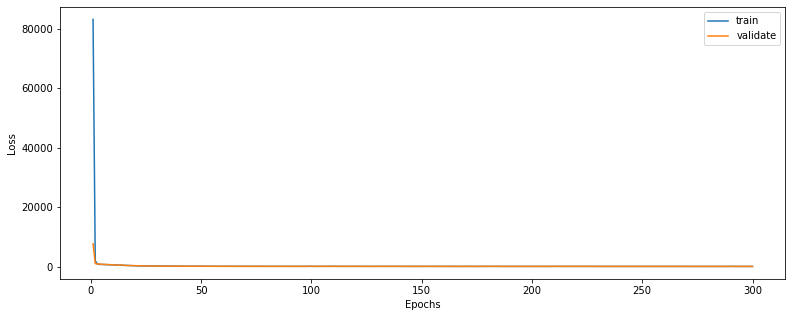

In [31]:
plot_loss(history)


In [32]:
n_vals = 100
yhats = [model.predict(X_test) for _ in range(n_vals)]

In [33]:
#average over all predictions 
avg = np.squeeze(yhats).mean(axis=0)
std = np.squeeze(yhats).std(axis=0)

#calculate some regression metrics
rmse = np.sqrt(np.mean(np.power(y_test-avg,2),axis=0))
print(rmse)
mse = np.mean(np.power(y_test-avg,2),axis=0)
print(mse)
mean_std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
print(mean_std)

Werkstueck_boden          7.068853
Werkstueck_zarge_mitte    6.348053
Werkstueck_zarge_oben     6.421794
dtype: float64
Werkstueck_boden          49.968681
Werkstueck_zarge_mitte    40.297771
Werkstueck_zarge_oben     41.239436
dtype: float64
[0.00063049 0.0031794  0.00094124]


In [34]:
def var_evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

def var_kfold(model, k, nvals=100):
    train_scores = [] 
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
            
        yhats = [model.predict(fold_X) for _ in range(nvals)]  
        avgs = np.squeeze(yhats).mean(axis=0)
        print(np.shape(avgs))
        print(np.shape(fold_y))
        rmse = np.mean(np.sqrt(np.mean(np.power(fold_y-avgs,2),axis=0)))
        variance = r2_score(fold_y, avgs)
        #std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
        train_scores.append([rmse, variance])

    
    mean_train = np.mean(train_scores, axis=0)
    print(train_scores)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

In [35]:
rmses, r2s = var_kfold(model,3)

__________Fold 1__________
21/21 [==============================] - 0s 2ms/step - loss: 6.0023
(660, 3)
(660, 3)
__________Fold 2__________
21/21 [==============================] - 0s 2ms/step - loss: 58.1328
(660, 3)
(660, 3)
__________Fold 3__________
21/21 [==============================] - 0s 1ms/step - loss: 70.8713
(659, 3)
(659, 3)
[[2.300471280357391, 0.9999467032673673], [7.852494912428054, 0.9994569522773372], [6.537254798776896, 0.999549202355298]]
__________Summary__________
RMSE:5.6+/-2.4 , R2:0.99965+/-0.00021


In [36]:
y_hat_train = np.mean([model.predict(X_train) for _ in range(n_vals)], axis=0)
y_hat_test = avg

res = unumpy.uarray(avg,std)
print(res)

[[825.4220581054688+/-0.0003662109375 818.3445434570312+/-0.0010986328125
  820.000732421875+/-0.000732421875]
 [825.4349975585938+/-6.103515625e-05 818.36474609375+/-0
  820.0156860351562+/-0.00030517578125]
 [825.4249267578125+/-0.00067138671875
  818.3562622070312+/-0.00079345703125 820.0072021484375+/-0.00048828125]
 ...
 [314.8788757324219+/-6.103515625e-05
  309.9158935546875+/-0.000274658203125
  312.70263671875+/-0.00030517578125]
 [311.9063720703125+/-0.000244140625 306.8573303222656+/-0.00018310546875
  309.6640930175781+/-3.0517578125e-05]
 [309.0014343261719+/-0.000396728515625
  303.8657531738281+/-0.00042724609375
  306.6933288574219+/-3.0517578125e-05]]


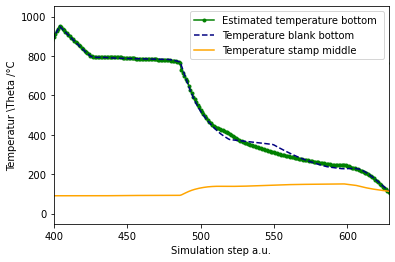

In [49]:

#plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Estimated temperature bottom ')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperature blank bottom', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperature stamp middle', color='orange')
plt.fill_between(Timestamp,  y_hat_test[:,0] + std[:,0],  y_hat_test[:,0]-std[:,0], alpha=0.4)
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Simulation step a.u.')
plt.xlim(400, 628)
plt.legend()
plt.savefig('plots/var_mlp.png')

# LSTM?

In [38]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
tf.__version__

'2.8.0'

In [39]:
# taken from the TF Documentation
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=test_data, test_df=test_data,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
    def plot(self, model=None, plot_col='Werkstueck_boden', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [min]')
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
    # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
    # And cache it for next time
        self._example = result
        return result


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(amsgrad=True),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.RootMeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    multi_lstm_model.summary()
    return history



Total window size: 110
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109]
Label column name(s): ['Werkstueck_boden', 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

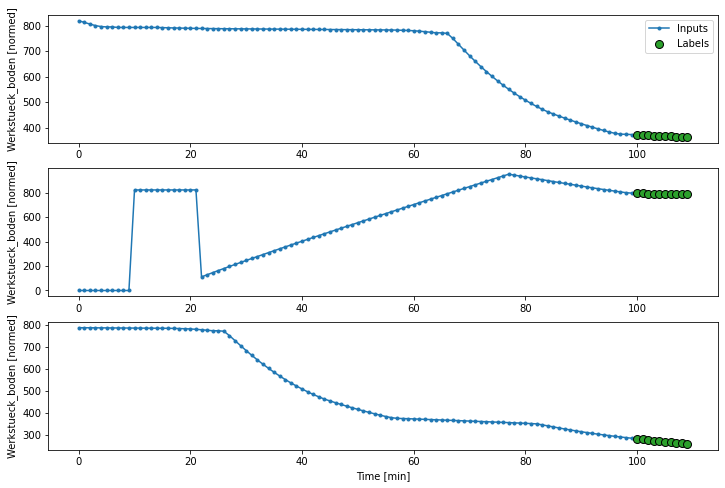

In [40]:
OUT_STEPS = 10
MAX_EPOCHS = 300
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=targets,
                               train_df=train_data,
                               val_df=test_data)

multi_window.plot()
multi_window

In [41]:
num_features = output_dim
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(13, return_sequences=True),
    tf.keras.layers.LSTM(169, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])


history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/300
59/59 [==============================] - 14s 187ms/step - loss: 341547.5312 - mean_absolute_error: 492.4528 - root_mean_squared_error: 584.4207 - val_loss: 361993.6562 - val_mean_absolute_error: 528.4358 - val_root_mean_squared_error: 601.6591
Epoch 2/300
59/59 [==============================] - 10s 169ms/step - loss: 330614.2812 - mean_absolute_error: 485.1372 - root_mean_squared_error: 574.9907 - val_loss: 350826.5000 - val_mean_absolute_error: 519.7643 - val_root_mean_squared_error: 592.3060
Epoch 3/300
59/59 [==============================] - 10s 164ms/step - loss: 320688.4375 - mean_absolute_error: 478.3329 - root_mean_squared_error: 566.2936 - val_loss: 340370.4688 - val_mean_absolute_error: 511.4782 - val_root_mean_squared_error: 583.4128
Epoch 4/300
59/59 [==============================] - 10s 162ms/step - loss: 311350.0312 - mean_absolute_error: 471.7921 - root_mean_squared_error: 557.9874 - val_loss: 330410.7812 - val_mean_absolute_error: 503.4262 - val_root_mean_

KeyboardInterrupt: 

In [ ]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


In [ ]:
multi_lstm_model.predict(multi_window.val)